# Emotion Detection of Text(Emotion Classification of text)

In [8]:
!pip install neattext

In [9]:
## lOading packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import neattext.functions as nfx


In [10]:
## Importing text

emotionDf = pd.read_csv("C:/Users/dell/Desktop/emotion_dataset.csv")

emotionDf.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


## Simple Data Exploration

In [11]:
emotionDf.shape

(34792, 2)

In [12]:
emotionDf.dtypes

Emotion    object
Text       object
dtype: object

In [13]:
emotionDf.isnull().sum()

Emotion    0
Text       0
dtype: int64

There is no null values.

In [14]:
## Let's see the emotion distribution in our dependent column

emotionDf['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

## Let's visualize it



<AxesSubplot:xlabel='Emotion', ylabel='count'>

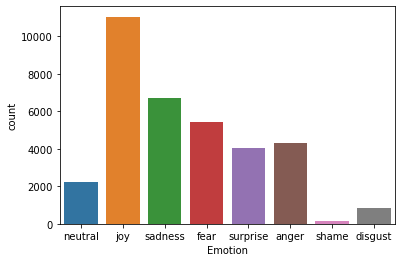

In [15]:
sns.countplot(x="Emotion",data= emotionDf)

* Sentiment Analysis
* Keyword Extraction
    
    * Keywords extraction for each emotion
    * Wordcloud

In [16]:
!pip install textblob

### About Textblob

Textblob is an open-source python library for processing textual data. It performs different operations on textual data such as noun phrase extraction, sentiment analysis, classification, translation, etc.

In [17]:
## Sentiment analysis

from textblob import TextBlob



In [18]:
def get_sentiment(text):
    
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        result = "Positive"
    elif sentiment < 0:
        result = "Negative"
        
    else:
        result = "Neutral"
        
    return(result)
    

In [19]:
get_sentiment("He is someone I don't like to talk to")

'Neutral'

In [20]:
## Passing the get_Sentiment function through the text

emotionDf['Sentiment'] = emotionDf['Text'].apply(get_sentiment)

In [21]:
emotionDf.head()

,Emotion,Text,Sentiment
0,neutral,Why ?,Neutral
1,joy,Sage Act upgrade on my to do list for tommorow.,Neutral
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative
3,joy,Such an eye ! The true hazel eye-and so brill...,Positive
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral


In [22]:
## Comparing the emotions vs the sentiment

emotionDf.groupby(['Emotion','Sentiment']).size()

Emotion   Sentiment
anger     Negative     1787
          Neutral      1386
          Positive     1124
disgust   Negative      324
          Neutral       251
          Positive      281
fear      Negative     1534
          Neutral      1844
          Positive     2032
joy       Negative     1682
          Neutral      3649
          Positive     5714
neutral   Negative      178
          Neutral      1523
          Positive      553
sadness   Negative     2629
          Neutral      2128
          Positive     1965
shame     Negative       46
          Neutral        50
          Positive       50
surprise  Negative      623
          Neutral      1545
          Positive     1894
dtype: int64

<AxesSubplot:xlabel='Emotion,Sentiment'>

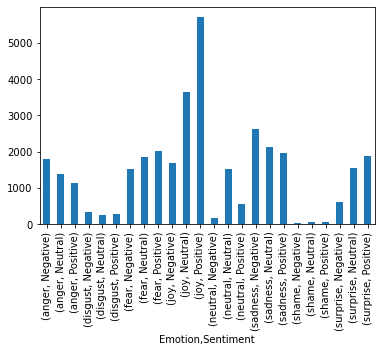

In [23]:
## Ploting the result

emotionDf.groupby(['Emotion','Sentiment']).size().plot(kind = 'bar')

C:\Users\dell\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


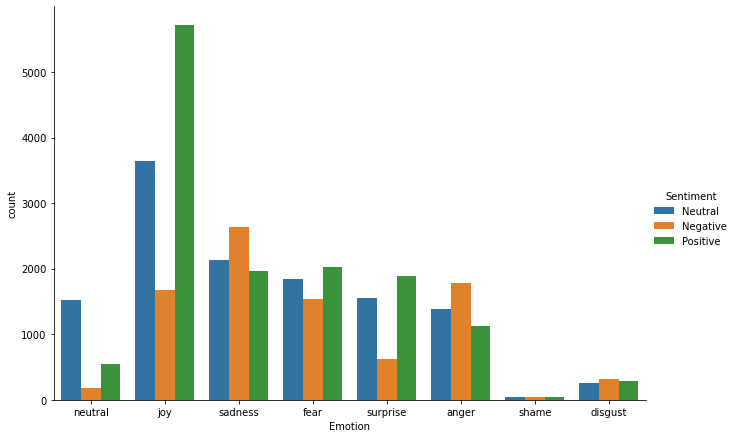

In [24]:
sns.factorplot(x = "Emotion",hue = "Sentiment",data = emotionDf,kind = 'count',size = 6,aspect = 1.5)

### Text Cleaning

I will perform:

* Remove noise
    * stopwords
    * Removing the special charecters
    * Removing punctuations
    * Emojis
    

We can use different nlp packages for doing the textcleaning. The top-most would be NLTK,spacy. I have used NLTK and spacy in my other projects for a change this time I want to use NeatText for text cleaning.

#### What is NeatText?

NeatText is a simple Natural Language Processing package for cleaning text data and pre-processing text data. It can be used to clean sentences, extract emails, phone numbers, weblinks, and emojis from sentences

    

In [25]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [26]:
emotionDf['Clean_text'] = emotionDf['Text'].apply(nfx.remove_stopwords)

In [27]:
## removing punctuations and userhhhandles

emotionDf['Clean_text'] = emotionDf['Clean_text'].apply(nfx.remove_userhandles)  ## means the words with @



In [28]:
emotionDf['Clean_text'] = emotionDf['Clean_text'].apply(nfx.remove_punctuations)

In [29]:
emotionDf[['Text','Clean_text']]

,Text,Clean_text
0,Why ?,
1,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...
34787,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,A man robbed me today .,man robbed today
34790,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


In [30]:
## function helping to convert text into lower text

def lower_case(text):
    text = text.lower()
    
    return text





In [31]:
emotionDf['Clean_text'] = emotionDf['Clean_text'].apply(lower_case)

emotionDf['Clean_text']

0                                                         
1                           sage act upgrade list tommorow
2        way homegirl baby funeral man hate funerals sh...
3        eye  true hazel eyeand brilliant  regular feat...
4          ugh babe hugggzzz u  babe naamazed nga ako e...
                               ...                        
34787           gift hope like it hand wear  itll warm lol
34788           world didnt meso world definitely cnt away
34789                                    man robbed today 
34790                            youu jealousy #losing you
34791                                think baby dream time
Name: Clean_text, Length: 34792, dtype: object

In [32]:
emotionDf.head()

,Emotion,Text,Sentiment,Clean_text
0,neutral,Why ?,Neutral,
1,joy,Sage Act upgrade on my to do list for tommorow.,Neutral,sage act upgrade list tommorow
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative,way homegirl baby funeral man hate funerals sh...
3,joy,Such an eye ! The true hazel eye-and so brill...,Positive,eye true hazel eyeand brilliant regular feat...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral,ugh babe hugggzzz u babe naamazed nga ako e...


### Keyword Extraction

* Extract most commonest words class of emotion


In [33]:
from collections import Counter   #The Counter holds the data in an unordered collection, just like hashtable objects. · It allows you to count the items in an iterable list.

In [34]:
def extract_keywords(text,num = 50):
    tokens = [tok for tok in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [35]:
## List of emotions

emotion_list = emotionDf['Emotion'].unique().tolist()
emotion_list

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [36]:
joy_list = emotionDf[emotionDf['Emotion'] == 'joy']['Clean_text'].tolist()
sad_list = emotionDf[emotionDf['Emotion'] == 'sadness']['Clean_text'].tolist()
neutral_list = emotionDf[emotionDf['Emotion'] == 'neutral']['Clean_text'].tolist()
anger_list = emotionDf[emotionDf['Emotion'] == 'anger']['Clean_text'].tolist()
disgust_list = emotionDf[emotionDf['Emotion'] == 'disgust']['Clean_text'].tolist()
shame_list = emotionDf[emotionDf['Emotion'] == 'shame']['Clean_text'].tolist()
fear_list = emotionDf[emotionDf['Emotion'] == 'fear']['Clean_text'].tolist()
surprise_list = emotionDf[emotionDf['Emotion'] == 'surprise']['Clean_text'].tolist()


In [37]:
joy_docx = ' '.join(joy_list)
sad_docx = ' '.join(sad_list)
neutral_docx =' '.join(neutral_list)
anger_docx =' '.join(anger_list)
disgust_docx =' '.join(disgust_list)
shame_docx =' '.join(shame_list)
fear_docx =' '.join(fear_list)
surprise_docx = ' '.join(surprise_list)

In [39]:
## Extracting keywords

keyword_joy = extract_keywords(joy_docx)
keyword_sad = extract_keywords(sad_docx)
keyword_neutral = extract_keywords(neutral_docx)
keyword_anger = extract_keywords(anger_docx)
keyword_disgust = extract_keywords(disgust_docx)
keyword_shame = extract_keywords(shame_docx)
keyword_fear = extract_keywords(fear_docx)
keyword_surprise= extract_keywords(surprise_docx)

In [40]:
## plot

def plot_words(mydict,emotion_name):
    df_01 = pd.DataFrame(mydict.items(),columns = ['token','count'])
    plt.figure(figsize = (20,10))
    plt.title('Plot of {}'.format(emotion_name))
    sns.barplot(x ='token',y ='count',data = df_01)
    plt.xticks(rotation = 45)
    plt.show()
    

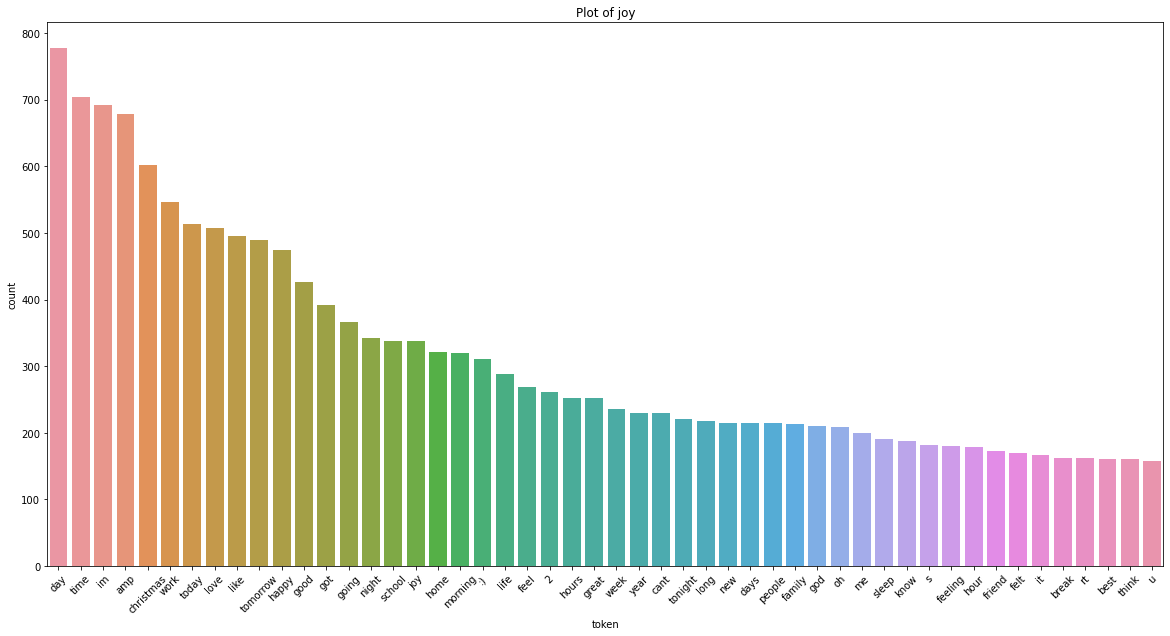

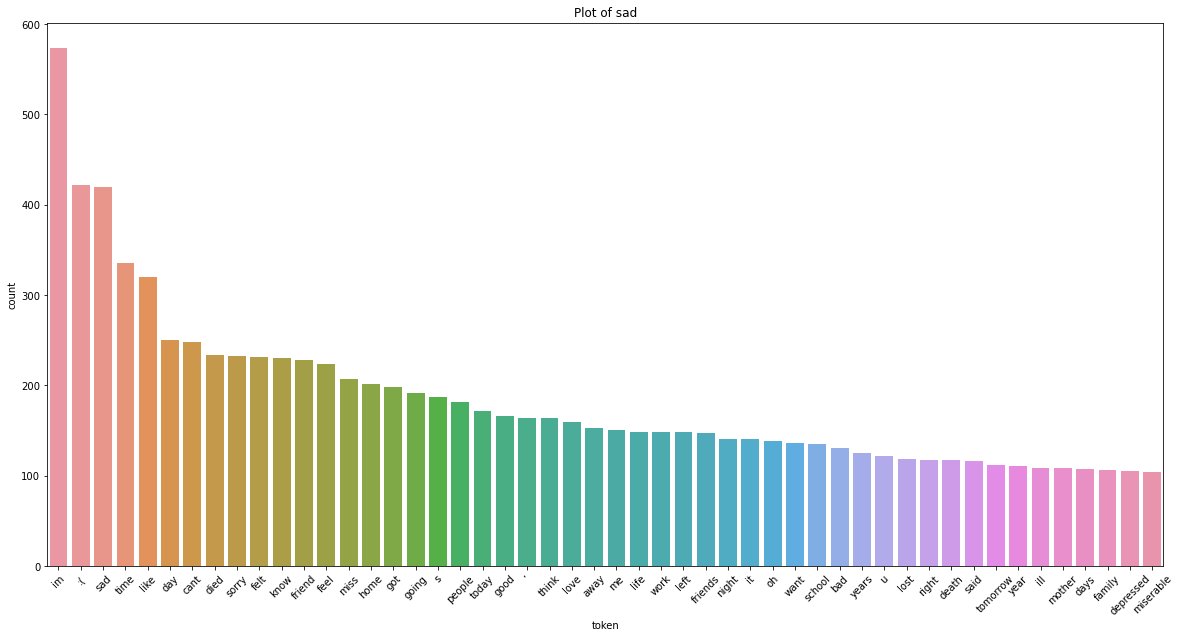

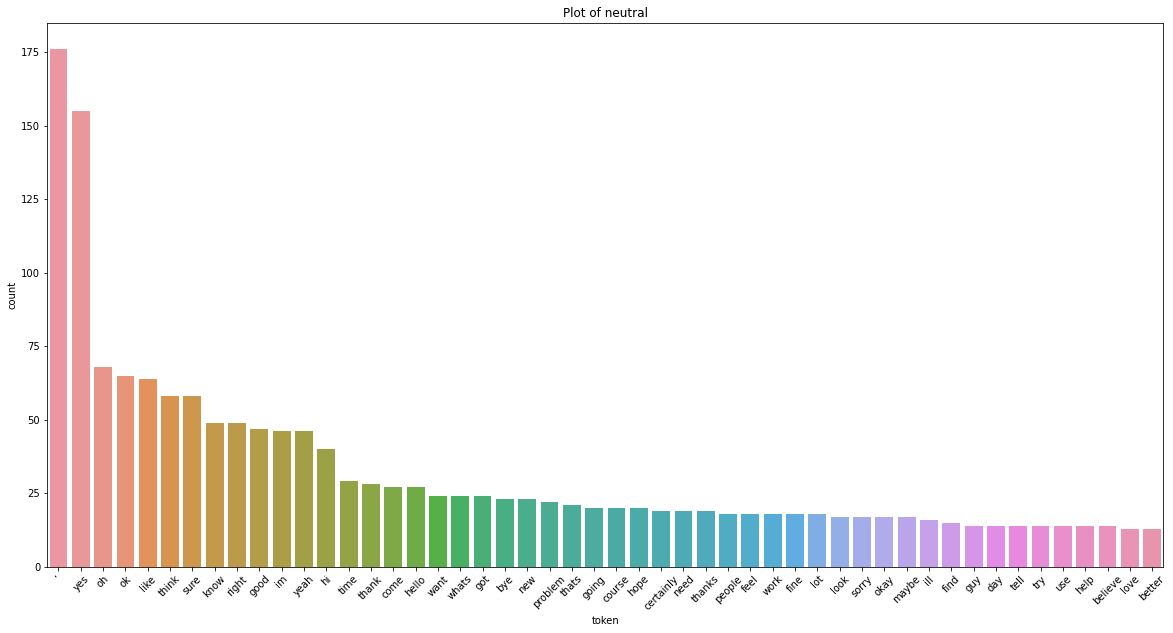

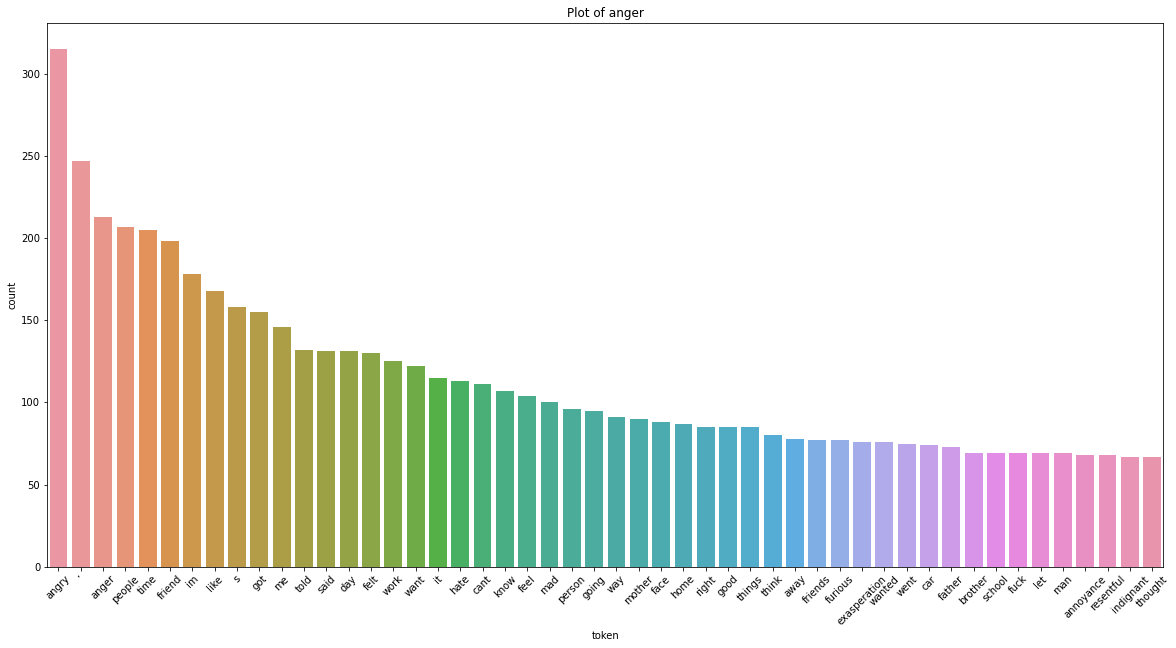

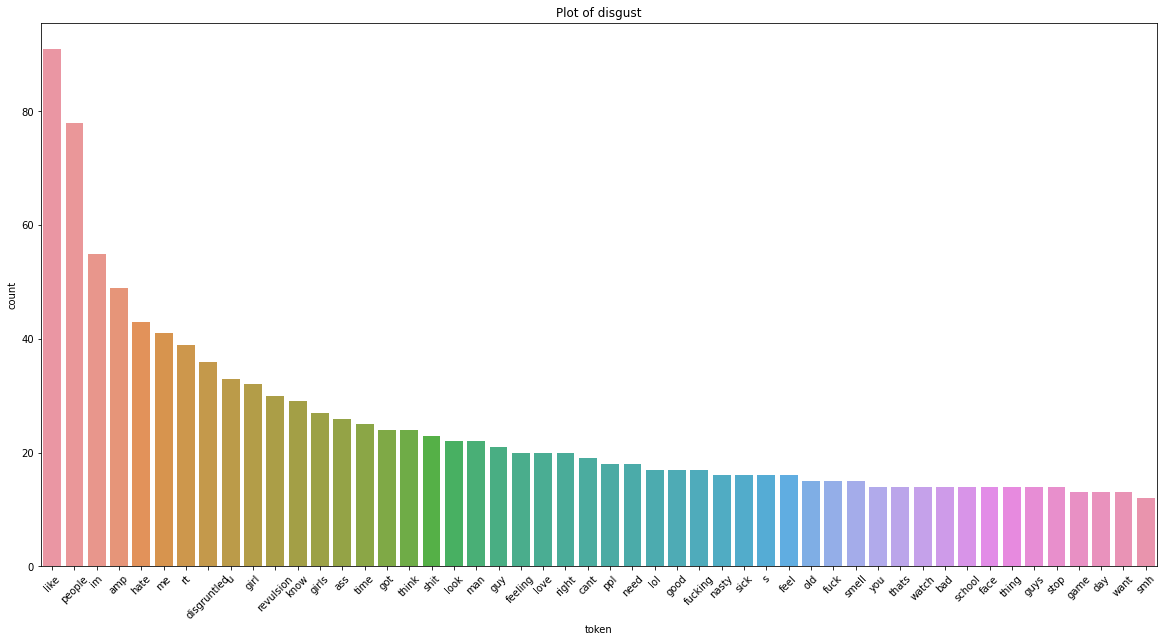

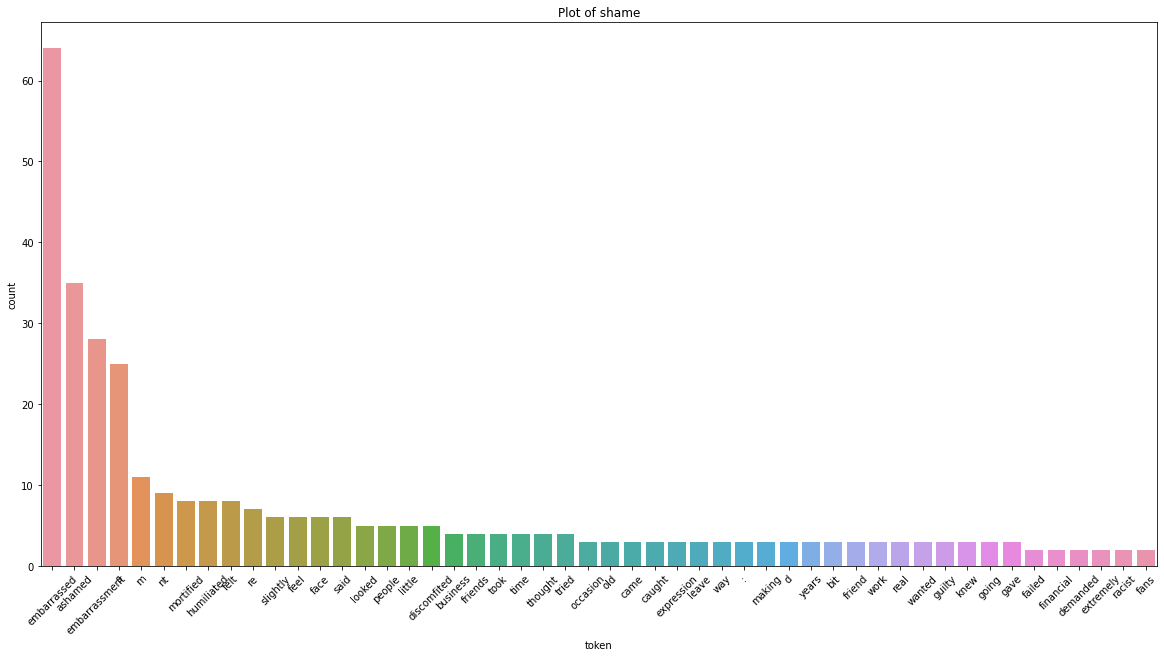

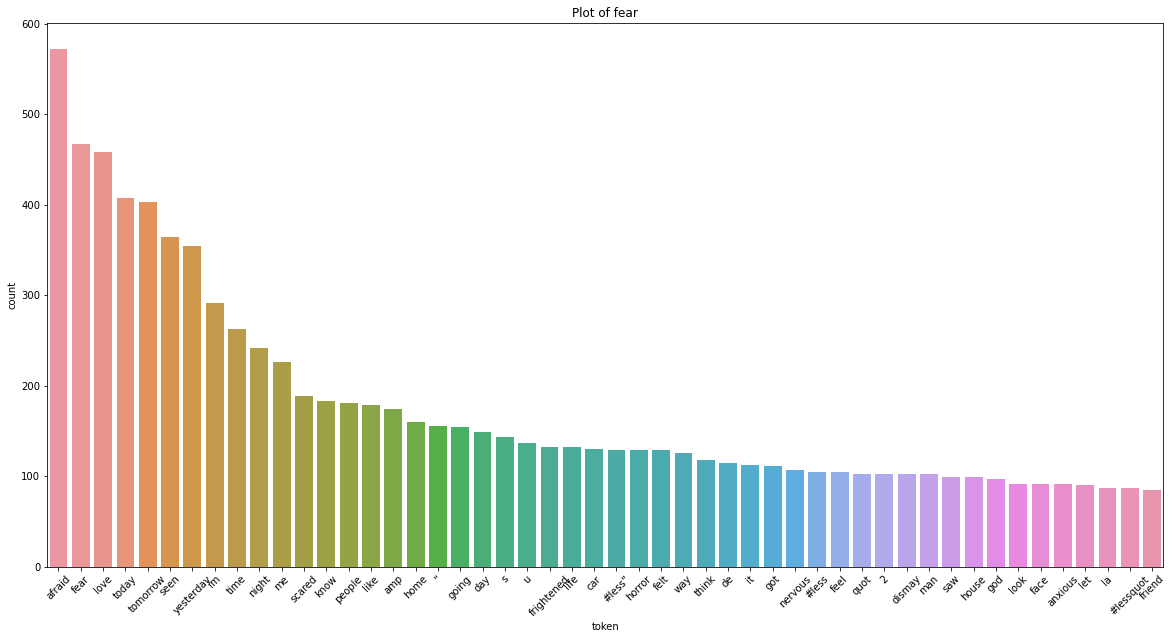

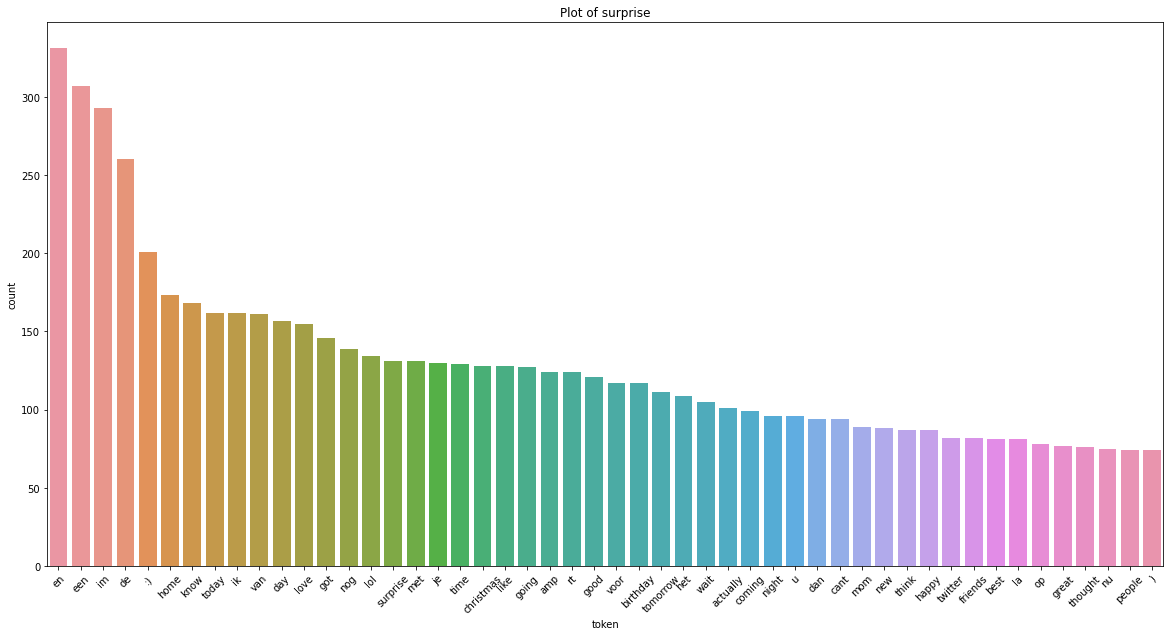

In [41]:
plot_words(keyword_joy,"joy")
plot_words(keyword_sad,"sad")
plot_words(keyword_neutral,"neutral")
plot_words(keyword_anger,"anger")
plot_words(keyword_disgust,"disgust")
plot_words(keyword_shame,"shame")
plot_words(keyword_fear,"fear")
plot_words(keyword_surprise,"surprise")


In [42]:
## Now representing the words using wordclouds

from wordcloud import WordCloud

In [43]:
def plot_wordcloud(doc):
    mywordcloud = WordCloud().generate(doc)
    plt.figure(figsize = (20,10))
    plt.imshow(mywordcloud,interpolation = 'bilinear')
    plt.axis('off')
    plt.show()
    

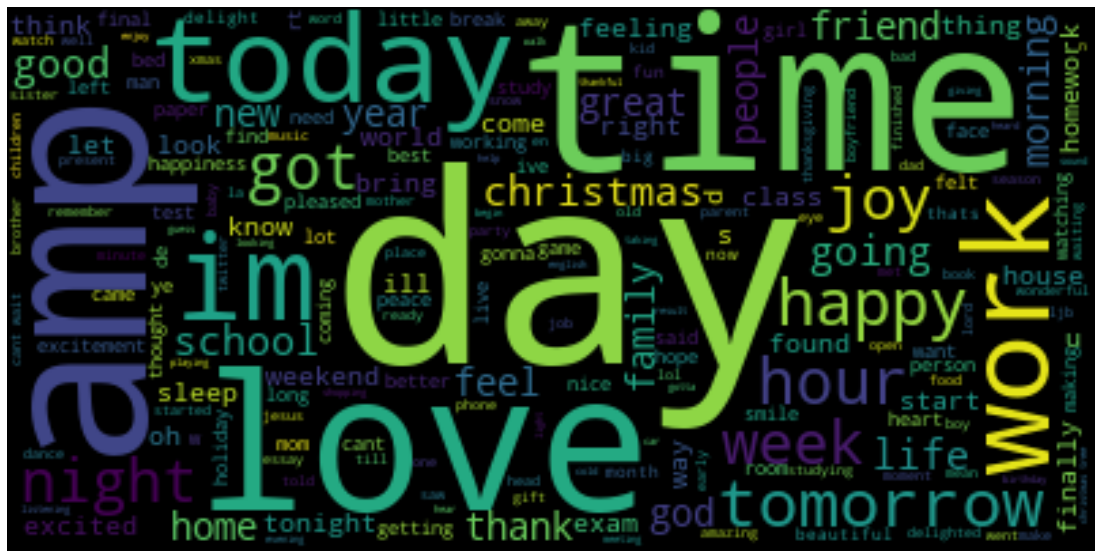

In [44]:
plot_wordcloud(joy_docx)

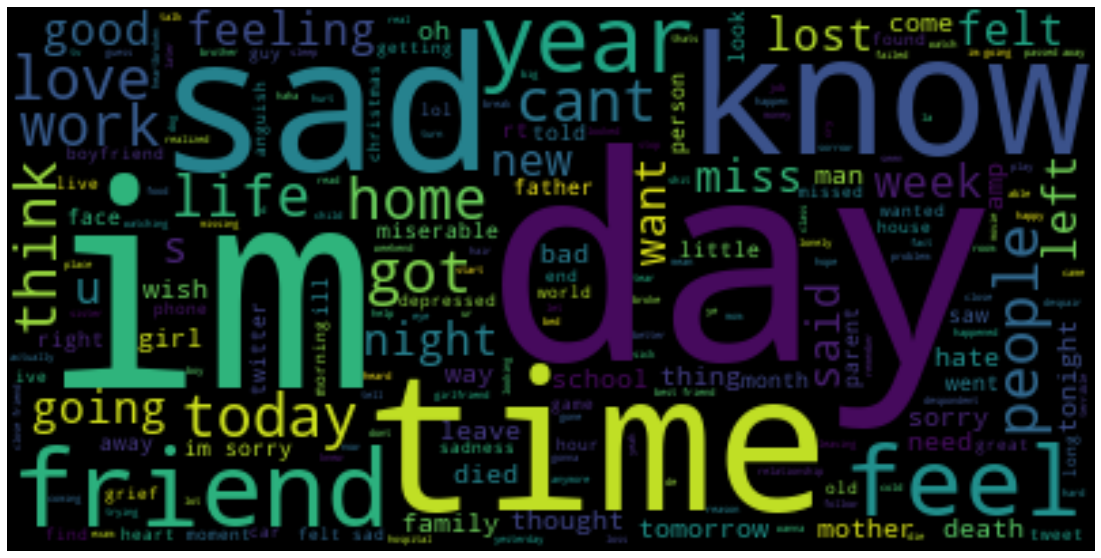

In [45]:
plot_wordcloud(sad_docx)

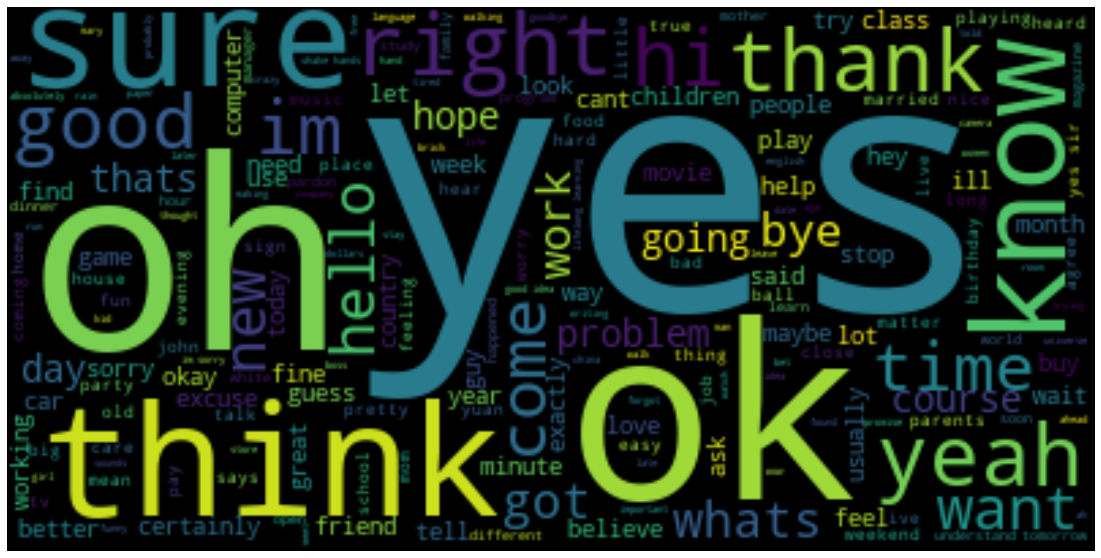

In [46]:
plot_wordcloud(neutral_docx)

## Machine learning 

* Naive Bayes
* LogisticRegression
* KNN
* DecisionTree

In [91]:
## Load ML pkgs

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB


##Vectorizer

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# Metrics

from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report,plot_confusion_matrix

##Splitting the datasets

from sklearn.model_selection import train_test_split


In [48]:
### Build features from our text

Xfeatures = emotionDf['Clean_text']
ylabels = emotionDf['Emotion']

### Feature Engineering part

In [50]:
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

### What is a countVectorizer??
CountVectorizer is a great tool provided by the scikit-learn library in Python. It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.

Scikit-learn’s CountVectorizer is used to convert a collection of text documents to a vector of term/token counts. It also enables the ​pre-processing of text data prior to generating the vector representation. This functionality makes it a highly flexible feature representation module for text.


For more information refer to the following blog:
https://towardsdatascience.com/basics-of-countvectorizer-e26677900f9c

In [52]:
## Get Features By name

cv.get_feature_names()

['00',
 '000',
 '000ème',
 '0021',
 '00am',
 '00pm',
 '01',
 '0235299130',
 '0330',
 '0400',
 '045',
 '05',
 '0512',
 '06',
 '073',
 '0798765',
 '08',
 '0800',
 '09',
 '099b8',
 '0l',
 '0ntworpen',
 '0o',
 '0oquot',
 '0w',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '100000yr',
 '10000th',
 '1000gifts',
 '1000s',
 '1000shs',
 '1000th',
 '100s',
 '100th',
 '101',
 '1010',
 '1015',
 '101quot',
 '102',
 '1021',
 '1022',
 '103',
 '1030',
 '1030am',
 '1030pm',
 '10373629',
 '104',
 '1040',
 '105',
 '106',
 '1080',
 '10am',
 '10ans',
 '10h',
 '10hrs',
 '10k',
 '10mins',
 '10pm',
 '10puntos',
 '10ritengono',
 '10th',
 '10x',
 '10year',
 '10years',
 '10yrolds',
 '11',
 '110',
 '1100pm',
 '1104',
 '110km',
 '111',
 '1111ème',
 '112',
 '1130',
 '115',
 '1162',
 '118',
 '11am',
 '11hour',
 '11months',
 '11pm',
 '11yr',
 '12',
 '120',
 '1200',
 '121',
 '12181',
 '122',
 '122511',
 '123',
 '1230',
 '125',
 '1250',
 '12521260',
 '128',
 '128600',
 '1295',
 '12days',
 '12hours',
 '12hr',
 '12hrstwi

In [53]:
## splitting our dataset

X_train,X_test,y_train,y_test = train_test_split(X,ylabels,test_size = 0.3,random_state = 42)

### Building a preliminaryModel

In [54]:
## Building our models

naiveModel = MultinomialNB()

naiveModel.fit(X_train,y_train)

MultinomialNB()

In [55]:
## Accuracy 

naiveModel.score(X_test,y_test)

0.5642843456600881

In [57]:
## Predictions

y_pred_for_nv = naiveModel.predict(X_test)
y_pred_for_nv

array(['fear', 'sadness', 'sadness', ..., 'sadness', 'anger', 'sadness'],
      dtype='<U8')


### Let's make a single prediction

Making a prediction is quiet easy we will simply take in the text and then vectorize and and predict it for the output.


In [58]:
sample_text = ['I am in love,its a beautiful day']


In [62]:
vectText = cv.transform(sample_text).toarray()
vectText

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [61]:
naiveModel.predict(vectText)

array(['joy'], dtype='<U8')

In [64]:
## Check for the prediction probab

y_predict_probab = naiveModel.predict_proba(vectText)
y_predict_probab

array([[8.88003423e-04, 5.29316910e-06, 2.71223916e-02, 9.68946542e-01,
        2.77895779e-07, 2.43761706e-03, 6.12800201e-10, 5.99874328e-04]])

In [65]:
np.max(naiveModel.predict_proba(vectText))

0.9689465419101964

In [74]:
def predict_emotion(text,model):
    myvect = cv.transform(text).toarray()
    prediction = model.predict(myvect)
    pred_proba = model.predict_proba(myvect)
    pred_percentage_for_all = dict(zip(model.classes_,pred_proba))
    print(prediction[0])
    return pred_percentage_for_all
    


In [82]:


predict_emotion(['its gross'],naiveModel)

anger


{'anger': array([0.27036419, 0.13347733, 0.13071546, 0.18510818, 0.05644386,
        0.05076186, 0.00456707, 0.16856205])}

We can see that alot of time the model is not performing well and that's bydefault as it has a less accuracy rate, just 56. So we need to improve the model.

### Preliminary Model Evaluation

In [83]:
print(classification_report(y_test,y_pred_for_nv))

              precision    recall  f1-score   support

       anger       0.64      0.49      0.56      1283
     disgust       0.53      0.03      0.06       292
        fear       0.75      0.60      0.67      1645
         joy       0.51      0.86      0.64      3311
     neutral       0.30      0.02      0.04       675
     sadness       0.56      0.54      0.55      2015
       shame       1.00      0.03      0.05        36
    surprise       0.61      0.27      0.38      1181

    accuracy                           0.56     10438
   macro avg       0.61      0.36      0.37     10438
weighted avg       0.57      0.56      0.53     10438



In [89]:
## Finding confusion metrix

cm= confusion_matrix(y_test,y_pred_for_nv)

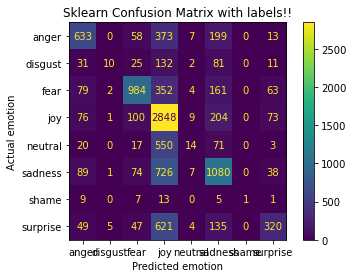

In [92]:
## Plotting 

cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['anger', 'disgust', 'fear','joy','neutral','sadness','shame','surprise'])

cmd_obj.plot()

cmd_obj.ax_.set(
                title='Sklearn Confusion Matrix with labels!!', 
                xlabel='Predicted emotion', 
                ylabel='Actual emotion')

plt.show()

In [95]:
## Let's perform the classification using svm

from sklearn.svm import SVC

svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

svclassifier.score(X_test,y_test)

0.6035639011304847

So we have got a better accuracy using SVM classifier over Naive bayes classifier.

## Let's work on improving the accuracy of our model

For doing that let's go back to our text. Remember while cleaning the text we have removed stopwords, removed unnecessary punctuations, lower the words but we haven't done word lemmatization and we are also using all the words in the given sentence there might be unnecessary words in our text that might me not so important so we will take care of everything to get extremly clean text in the sentences.

Task we will follow:
* Cleaning text(Removing numbers and also adding lemmatization)
* Changing vectorization technique(using TF-Idf instead)

### Text cleaning 2.0

In [102]:
!pip install autocorrect

  Created wheel for autocorrect: filename=autocorrect-2.5.1-py3-none-any.whl size=621801 sha256=b6bd4755af4683b32f086b95619e85874cd8c1659f8d5318a4122b41e5d40121
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\f6\2c\e1\220b749bccebe75524de3aa8c085e104715fa533d8225626c5
Successfully built autocorrect


In [103]:
##Importing nltk package
import nltk
import re

from nltk.tokenize import word_tokenize
nltk.download('punkt')

from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()

from autocorrect import spell


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [109]:
## Cleaning the text

##Defining a function

def clean_text2(message):
    message = re.sub('[^a-zA-Z]',' ',message)
    message = message.lower()
    message = message.split()
    words = [wnl.lemmatize(word) for word in message if word not in stop]
    
    return  " ".join(words)


emotionDf["CleanText2"] = emotionDf["Text"].apply(clean_text2)
emotionDf.head(n=10)
    

,Emotion,Text,Sentiment,Clean_text,cleanText2,CleanText2
0,neutral,Why ?,Neutral,,,
1,joy,Sage Act upgrade on my to do list for tommorow.,Neutral,sage act upgrade list tommorow,sage act upgrade list tommorow,sage act upgrade list tommorow
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative,way homegirl baby funeral man hate funerals sh...,way homegirl baby funeral man hate funeral rea...,way homegirl baby funeral man hate funeral rea...
3,joy,Such an eye ! The true hazel eye-and so brill...,Positive,eye true hazel eyeand brilliant regular feat...,eye true hazel eye brilliant regular feature o...,eye true hazel eye brilliant regular feature o...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral,ugh babe hugggzzz u babe naamazed nga ako e...,iluvmiasantos ugh babe hugggzzz u babe naamaze...,iluvmiasantos ugh babe hugggzzz u babe naamaze...
5,fear,I'm expecting an extremely important phonecall...,Positive,im expecting extremely important phonecall min...,expecting extremely important phonecall minute...,expecting extremely important phonecall minute...
6,sadness,.Couldnt wait to see them live. If missing th...,Negative,couldnt wait live missing nh7 wasnt painful en...,couldnt wait see live missing nh wasnt painful...,couldnt wait see live missing nh wasnt painful...
7,surprise,maken Tip 2: Stop op een moment dat je het hel...,Neutral,maken tip 2: stop op een moment dat je het hel...,maken tip stop op een moment dat je het hele p...,maken tip stop op een moment dat je het hele p...
8,surprise,En dan krijg je ff een cadeautje van een tweep...,Neutral,en dan krijg je ff een cadeautje van een tweep...,en dan krijg je ff een cadeautje van een tweep...,en dan krijg je ff een cadeautje van een tweep...
9,surprise,@1116am Drummer Boy bij op verzoek van @BiemO...,Neutral,drummer boy bij op verzoek van : welke ...,drummer boy bij op verzoek van biemoosterhof f...,drummer boy bij op verzoek van biemoosterhof f...


In [110]:
### Build features from our text

Xfeatures2 = emotionDf['CleanText2']
ylabels2 = emotionDf['Emotion']

### Feature Engineering 2.0

In [117]:
#vectorizer = TfidfVectorizer()

#x = vectorizer.fit_transform(Xfeatures2)

cv2 = CountVectorizer()
x = cv.fit_transform(Xfeatures2)



In [118]:
## splitting our dataset

x_train,x_test,y_train,y_test = train_test_split(x,ylabels2,test_size = 0.3,random_state = 42)

## Building Model 2.0

In [119]:
## Building our models

naiveModel2 = MultinomialNB()

naiveModel2.fit(x_train,y_train)

MultinomialNB()

In [120]:
## Accuracy 

naiveModel2.score(x_test,y_test)

0.5656255987737114